<div align="right">Python 2.7 Jupyter Notebook</div>

# Data Analysis Basics

### Your completion of the Notebook exercises will be graded based on your ability to:

> **Understand**: Does your pseudo-code and/or comments show evidence that you recall and understand technical concepts?

> **Apply**: Are you able to execute code, using the supplied examples, that perform the required functionality on supplied or generated data sets? 

> **Analyze**: Are you able to pick the relevant method, library or resolve specific stated questions?

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

> **Create**: Your ability to produce notebooks that serve as computational record of a session that can be used to share your insights with others? 

# Notebook introduction

When you create notebooks or other documents it is generally a good idea to continually document your progress and provide descriptions of the dataset as well as your observations. This makes it easier to revisit your work at a later stage or share it with other parties. This notebook will provide you with the opportunity to explore the given dataset on your own, as you would in a real-world data analysis setting.

We will introduce a number of techniques and best practices that you may utilize in later modules.

> **Note**: 

> We strongly recommend that you save a checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.

#### Load the relevant libraries and set options
When performing analysis tasks you can load the libraries as you need them in various places in the notebook. Many users have a standard set of libraries and settings that are used frequently. Starting your notebook with a section containing all the libraries that you use makes it easier to check that all the elements have been installed should you choose to share the notebook with others, or intend to run the notebook on different machines. You can always revisit and re-execute this section of your notebook at a later stage if you realize that you need to load additional libraries.

In [1]:
# Load the libraries that you will require in this notebook
from os import path
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure, show, rc
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Set plotting options
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


> **Note**:

> The libraries utilized in this notebook are included with the Anaconda Python distribution and you should not receive any errors when executing the section above. In subsequent notebooks and modules you will make use of libraries that do not come preinstalled in Anaconda. These additional libraries were either pre-installed on the image you used in the setup of your virtual analysis environment, or installed during the preparation phases of the various modules. Installing Anaconda on your own workstation is not encouraged during this course as there are too many factors to account for in standardizing the analysis environment.

## 1. Phases of Analysis

In Video 3, David Shrier provided an overview of the phases of data analysis, as can be seen below:

![Phases of Data Analysis](m1_f1_data_analysis.PNG "This image shows the phases of the data analysis cycle.")
#### Figure 1: Phases of data analysis

Some of the phases will be demonstrated in this notebook and it is good to know that you have various methods available to document your interactive computing session. You can utilize code, traditional comments in code blocks and a wide array of data input, processing and output tools to perform your analysis and document your process. Markdown cells, which will be introduced in more detail in the next notebook, can also be utilized to provide instructions, format text and embed images in order to convey your message to your intended target audience. 

### 1.1 Example: Generate a polar plot to indicate the typical analytical journey

To demonstrate the efficiency of visual communication, we have selected a polar plot to be used as a basis from which to communicate a concept. The graph values do not have any meaning or relevance apart from demonstrating the concept that the typical analysis cycle is usually iterative and converges on a result.

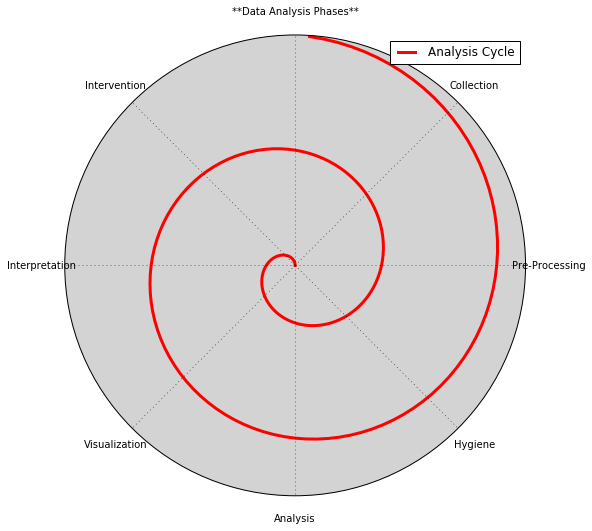

In [2]:
# Generate input data

# Numpy array with minimum, maximum and increment specified
# Change the maximum from 2.0 to 4.0 to simulate a longer analytic journey
r = np.arange(0, 2.0, 0.01) 

# Utilize Numpy constant Pi
theta = 2*np.pi*r

# Set plotting options and plot
fig = figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='polar', axisbg='#d3d3d3')
ax.plot(theta, r, color='r', lw=3, label='Analysis Cycle')
ax.set_xticklabels(['**Data Analysis Phases**', 'Intervention', 'Interpretation', 'Visualization', 'Analysis', 'Hygiene', 'Pre-Processing', 'Collection'])
ax.set_theta_zero_location('N')
ax.axes.get_yaxis().set_ticks([])
ax.legend()
show()

### 2. The 5 Rs of Data Quality
In video 4 David Shrier discussed the 5 Rs of data quality. The following sections of this notebook will demonstrate sample scripts that can be utilized to quickly look at your data in terms of the defined qualities. You will get the opportunity to start exploring and performing basic manipulations on provided datasets and will be introduced to concepts to keep in mind when working with data.

![5 R's of Data Quality](m1_f2_dq_5r.PNG "This image shows the 5 R's of data quality.")

> **Note**:

> Remember that context matters. When performing analysis you have to critically evaluate whether the data quality is adequate for the type of problem that you are trying to solve for. 

### 2.1 Loading data

Before you continue with the following section, please make sure that you visit [Dartmouth StudentLife](http://studentlife.cs.dartmouth.edu/dataset.html), and review the "Introduction" and "Citation" paragraphs to familiarize yourself with the privacy statements.

> **Note**:

> The datasets that you will start to use in this section will be utilized again in future modules and notebooks.

There are multiple options for loading ".csv" files. In the previous notebook, we introduced the [CSV](https://docs.python.org/2/library/csv.html) library for loading csv files. In this notebook you will use a similar function titled [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) from the Pandas library.

In [3]:
# Load a specified file to a Pandas dataframe
gps = pd.read_csv('gps_u02.csv')

### 2.2 Inspecting the data
The first step is to visually inspect the new data set. There are multiple options to achieve this, the easiest being to request the "head" to be returned with an optional argument that specifies the number of records.

In [4]:
# Review the data with "head()"
# gps.head(3) will return 3 records
# gps.tail() will return the records from the end of the dataset
gps.head()

,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate
0,1364357797,network,wifi,20.0,43.707127,-72.293314,0.0,0.0,0.0,stationary
1,1364358997,network,wifi,20.0,43.707123,-72.293319,0.0,0.0,0.0,stationary
2,1364360197,network,wifi,20.0,43.707166,-72.293272,0.0,0.0,0.0,stationary
3,1364361397,network,wifi,20.0,43.707158,-72.293285,0.0,0.0,0.0,stationary
4,1364362597,network,wifi,20.0,43.707131,-72.293320,0.0,0.0,0.0,stationary


The `info()` and `describe()` methods can also be utilized to provide additional information about the dataset.

In [5]:
# Review data types with "info()"
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 10 columns):
time            6607 non-null int64
provider        6607 non-null object
network_type    6344 non-null object
accuracy        6607 non-null float64
latitude        6607 non-null float64
longitude       6607 non-null float64
altitude        6607 non-null float64
bearing         6607 non-null float64
speed           6607 non-null float64
travelstate     6290 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 516.2+ KB


In [6]:
# Review numeric data with "describe()"
gps.describe()

,time,accuracy,latitude,longitude,altitude,bearing,speed
count,6.607000e+03,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,1.367687e+09,74.158883,43.706182,-72.292437,5.554109,2.390404,0.032516
std,1.624653e+06,255.141546,0.025016,0.017621,27.636964,23.205340,0.625369
min,1.364358e+09,3.000000,43.512803,-72.754270,0.000000,0.000000,0.000000
25%,1.366349e+09,25.118500,43.706573,-72.293224,0.000000,0.000000,0.000000
50%,1.368036e+09,36.122000,43.707108,-72.293184,0.000000,0.000000,0.000000
75%,1.369049e+09,58.230000,43.707131,-72.288852,0.000000,0.000000,0.000000
max,1.370057e+09,4027.000000,44.353047,-72.267886,306.100006,351.700000,35.003570


We can manipulate the dataframes or create new dataframes that contain subsets of the data.

In [7]:
# Create a new dataframe containing the count of records grouped by provider
group_provider = gps.groupby(['provider']).count().reset_index()

# Display the dataframe
group_provider

,provider,time,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate
0,gps,263,0,263,263,263,263,263,263,0
1,network,6344,6344,6344,6344,6344,6344,6344,6344,6290


The Pandas [groupby()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) method can accept a list of arguments. The syntax is "DataFrame.groupby(['element 1', 'element 2'])"

### Your turn:

Update the "grouped" variable to add "travelstate" to the groupby list.
Don't worry, you can scroll down to the bottom of the notebook if you get stuck on syntax.

In [10]:
# Change the line below to add "travelstate" to the groupby statement
grouped = gps.groupby(['provider','network_type','travelstate']).count()
# Display the new variable
grouped

time  accuracy  latitude  longitude  \
provider network_type travelstate                                        
network  cell         moving         57        57        57         57   
                      stationary     13        13        13         13   
         wifi         moving        942       942       942        942   
                      stationary   5278      5278      5278       5278   

                                   altitude  bearing  speed  
provider network_type travelstate                            
network  cell         moving             57       57     57  
                      stationary         13       13     13  
         wifi         moving            942      942    942  
                      stationary       5278     5278   5278

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

**Histograms** can be utilized to quickly compare subsets of the data. Let's look at the number of observations over time by provider.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c8944f810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2c86e7c310>], dtype=object)

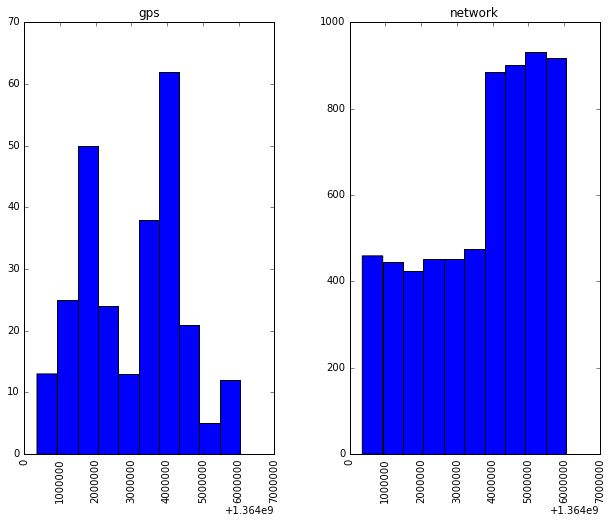

In [11]:
# Let's look at the observations or rows over time per provider as histograms
gps['time'].hist(by=gps['provider'])

The "hist()" method provides a very quick way of producing plots, but is limited in the options that can be specified. The plots produced above are good for visualizing the distribution of records over time, but have different scales on the y-axis and it is easy to misinterpret the results. You will be introduced to Matplotlib later in this notebook which offers more configuration options.

### 2.3 Recap

These are important questions to keep in mind when considering the five Rs:

**Relevancy**
- Is the data relevant to the problem that I am working with?
- Which features and values exist in the data set?
- Does it account for all types of use or is this a fractional view only? If it is a fraction, is it representative of the full population?<br>

**Recency**
- How recently was the data generated?
- Is the first or last record part of a consistent pattern or does the granularity change over time?
- Do I have dirty data (for example, dates that are later than the observation or point of producing the dataset) that skews my recency checks?

**Range**
- How narrow or wide is the scope of my data?

**Robustness**
- How robust is my data - what is the signal to noise ratio?

**Reliability**
- How accurate is the data that you are working with (for example, sensor vs survey data)?

<br>Here are a few additional examples to get you started.

### 2.4 Additional examples

No actions are required from your side in this section. It is purely to demonstrate sample code which you can reference at a later stage should you need examples of syntax.

#### 2.4.1 Example: Date range and data density

Generate the dataset to be utilized in this example. The details are not important at this stage.

In [12]:
# Create Pandas date range with starting date, number of periods and frequency as input arguments
r1 = pd.date_range('2014/01/01', periods=12, freq='M')
r2 = pd.date_range('2015/01/01', periods=365, freq='D')
r3 = pd.date_range('2015/01/01', periods=365, freq='D')
r4 = pd.date_range('2015/01/01', periods=365, freq='D')
r5 = pd.date_range('2016/01/01', periods=6, freq='M')

# Create a list containing all the date ranges
r = r1.append(r2).append(r3).append(r4).append(r5)

# Convert the list to a series with random values using the Numpy random function indexed by date
ts = pd.Series(np.random.randn(len(r)), index=r)

# Display the head of the series
ts.head()

2014-01-31    0.401255
2014-02-28   -3.637350
2014-03-31   -1.286642
2014-04-30   -0.342413
2014-05-31   -1.572173
dtype: float64

In [13]:
# display the type of the variable
type(ts)

pandas.core.series.Series

In [14]:
# Show summary statistics of numeric data
ts.describe()

count    1113.000000
mean       -0.050617
std         0.992475
min        -3.753095
25%        -0.707259
50%        -0.063343
75%         0.584347
max         3.830435
dtype: float64

When performing recency checks, one is often tempted to only retrieve the latest record.

In [15]:
# Return the min and max date
print ts.index.min()
print ts.index.max()

2014-01-31 00:00:00
2016-06-30 00:00:00


In some cases the minimum and maximum values do not tell you the full story and you may need to dig a bit deeper to better understand the data set. In the generated data set there is a difference in granularity with more frequent observations during 2015 than in 2014 and 2016. 

Depending on the type of analysis you are performing you may choose to:
- Work with the dataset as is;
- Work with a subset of the data; or
- Resample the data (Advanced).

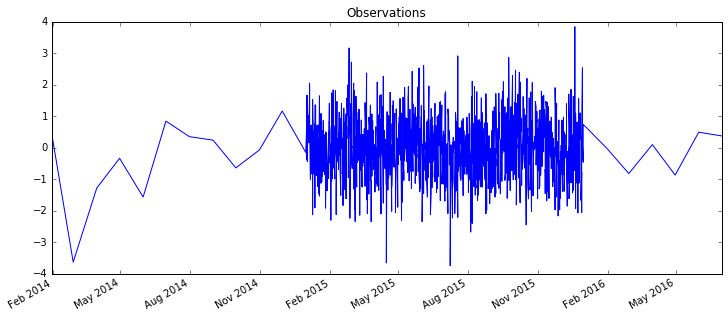

In [16]:
# Review the date distribution of the data graphically
ts.plot(title="Observations",figsize=[12,5])

The plot shows a higher density of observations during 2015. A new series will now be created which contains a subset of the original series that contains data from 2015. Please refer to the links to read more about Pandas methods, [Slicing ranges](http://pandas.pydata.org/pandas-docs/stable/indexing.html#slicing-ranges) and [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#selection-by-position).

In [17]:
# Create a new data frame, tsc, containing the subset of 2015 data and print the minimum and maximum values
tsc = ts.loc['2015-1-1':'2015-12-31']
print tsc.index.min()
print tsc.index.max()

2015-01-01 00:00:00
2015-12-31 00:00:00


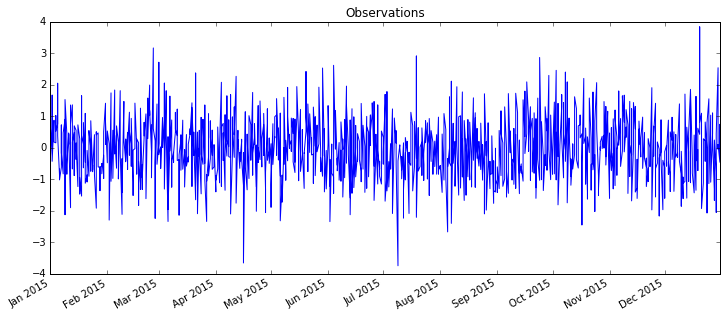

In [18]:
# Plot the new dataset
tsc.plot(title="Observations",figsize=[12,5])

#### 2.4.2 Example: Histogram of a normal distribution with a best fit line

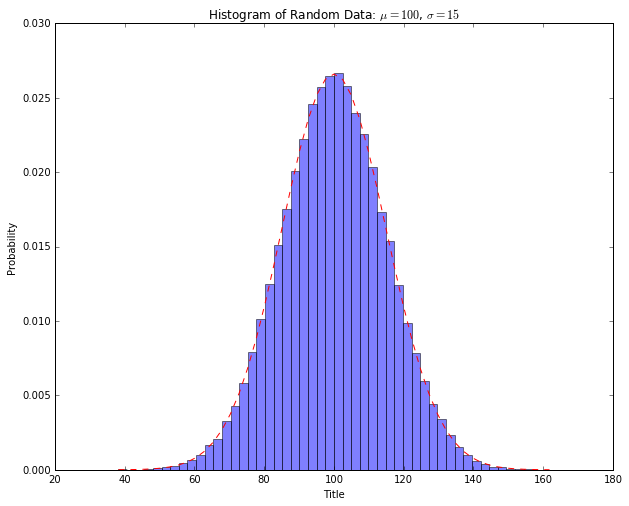

In [19]:
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(100000) # generate 100 000 data points
num_bins = 50 # set the number of bins

# create histogram and best fit line
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)

# plot
plt.plot(bins, y, 'r--')
plt.xlabel('Title')
plt.ylabel('Probability')
plt.title(r'Histogram of Random Data: $\mu=100$, $\sigma=15$')
plt.show()

## 3. Exercises

3.1 Refer to sections 2.1 and 2.2 of this notebook.
 - Load the wifi dataset provided in your "module_1" folder, to a variable called "ds_student". (The file name is "wifi_u02.csv")
 - Print the head, specifying the number of records to be returned as 3.
 - Group the dataframe by BSSID, set "ds_student_grouped" equal to the result, and display the top 5 records of the new dataframe. 

3.2 Based on the recap statements in section 2.3, can you offer any insights or observations on any of the datasets utilized in this notebook? Your answer should be two or three sentences long, and can be submitted as comment in the code cell or in markdown in the provided markdown cell.
 - To write comments in code blocks, you can start the line with #.
 - You can change code cells to markdown cells by selecting the cell and then changing the type in the Jupyter toolbar at the top of your notebook.

3.3 Explore the [Matplotlib Gallery](http://matplotlib.org/gallery.html) and paste the source code to a plot or create your own plot based on one of the examples. The intention here is just to show you that there are many resources available that you can leverage; any plot will do. Add the link to the source if you use either matplotlib or another example as the basis for your input.

#### 3.1) Your Answer

In [26]:
ds_student = pd.read_csv('wifi_u02.csv')
print ds_student.head(3)

ds_student_grouped = ds_student.groupby(['BSSID']).count()
ds_student_grouped.head(5)

         time              BSSID  freq  level
0  1364356912  1c:17:d3:fd:0d:82  2437    -89
1  1364356912  60:33:4b:e8:1d:27  2437    -84
2  1364356912  7c:d1:c3:cd:66:d6  2432    -92


,time,freq,level
BSSID,,,
00:01:36:57:be:87,633,633,633
00:01:36:57:be:88,1630,1630,1630
00:02:6f:52:c7:8c,4,4,4
00:02:6f:86:e8:70,62,62,62
00:02:6f:86:e8:71,215,215,215


#### 3.2) Your Answer

In [ ]:
# Answer as comment in code cell

For example, the dataset of dates, data is related to data analysis. It is recent because we just generated it. The scope of data is not wide considering that it is simply between 2014/01/01 and 2016/07/01. There is no noise because it is exactly the data we need. It is accurate because we generated it on purpose.

#### 3.3) Your Answer:

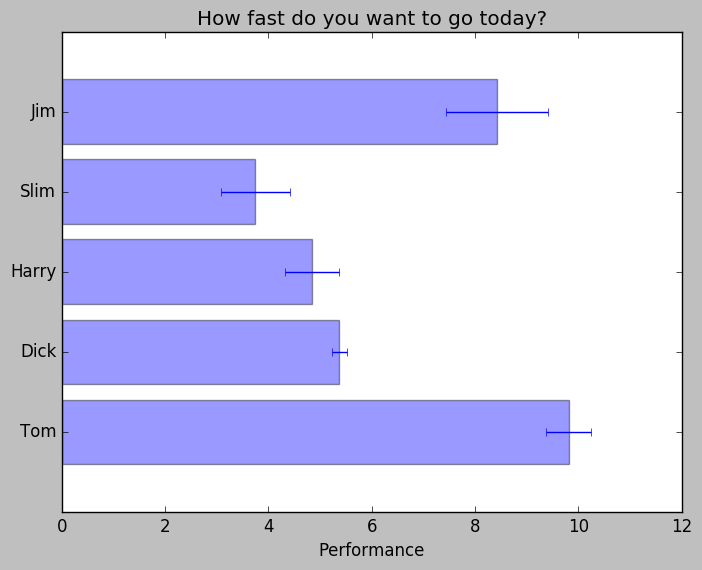

In [27]:
"""
Simple demo of a horizontal bar chart.
"""
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.title('How fast do you want to go today?')

plt.show()

# source: http://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

## 4. Answer to the groupby exercise in section 2.2

> `grouped_answer = gps.groupby(['provider', 'network_type','travelstate']).count()`

> `grouped_answer`

## 5. Submit your notebook

Please make sure that you:
- Perform a final "Save and Checkpoint";
- Download a copy of the notebook in ".ipynb" format to your local machine using "File", "Download as" and "IPython Notebook (.ipynb)";
- Submit a copy of this file to the online campus.